In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time
import sys

from ML_matcher_helpers import *

# MLPRegressor $ \rightarrow $ solver = adam
Multi-layer Perceptron regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [2]:
# Load trainning data
NPions = "10"
trainning_data, trainning_data_MatchTruth, trainning_data_NPairsMCHTracks = load_data(NPions, nMCHTracks="50000")

# Scale trainning data
scaler = StandardScaler()
scaler.fit(trainning_data)
trainning_data = scaler.transform(trainning_data)

Data not loaded! Continuing...
Loading data_50000MCHTraks_20Mu_10PiPerEvent
Loaded data in  0.11012034858334421  minutes ( 6.607220915000653  seconds)
N MCH Tracks = 50000
N pairs = 1368617


In [3]:
# MLPRegressor trainning
hiddenLayersConfig=(30,25,20,15,10,5)
mlpr = MLPRegressor_initAndTrain(hiddenLayersConfig,
                                solver = 'adam',
                                max_iter = 20000,
                                activation = 'relu',
                                trainning_data = trainning_data,
                                trainning_data_MatchTruth = trainning_data_MatchTruth)

mlpr trainning time =  1.3943234566337197  minutes
Trainning Accuracy:  0.9586037647308651


In [4]:
# Load test data
NPions = "10"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_10PiPerEvent
Loaded data in  0.0012980915164613786  minutes ( 0.07788549098768272  seconds)
N MCH Tracks = 1000
N pairs = 27873


In [5]:
# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

Prediction accuracy:
 0.9617771098016074


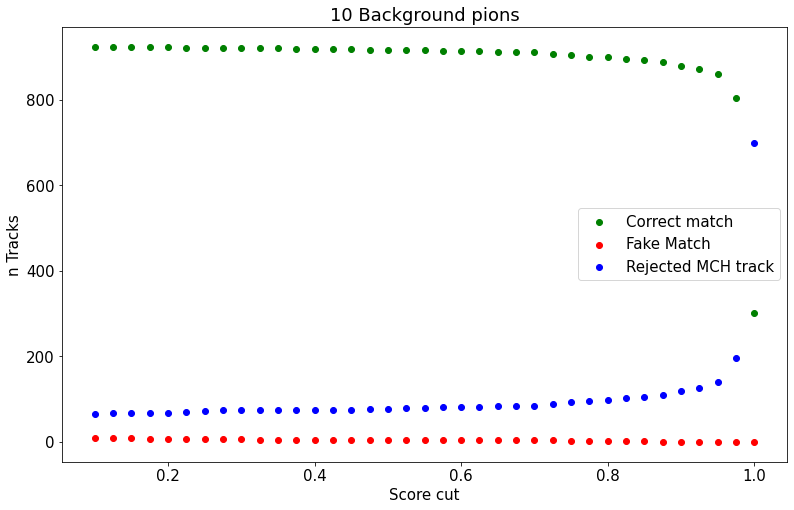

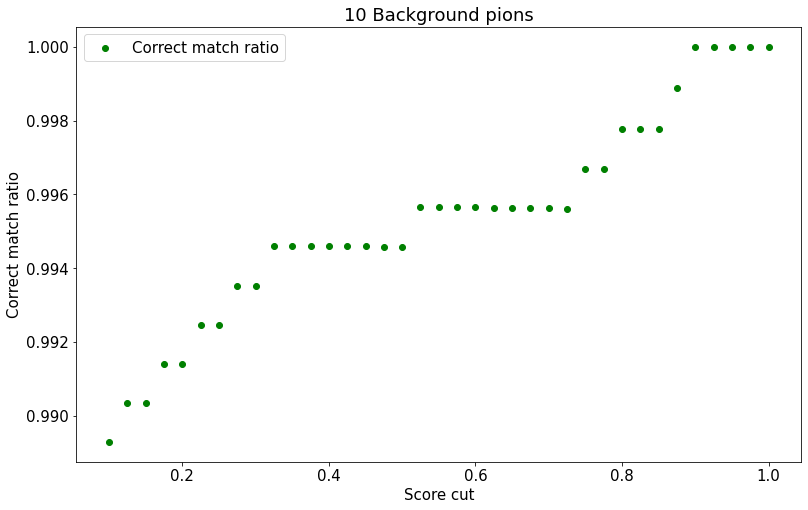

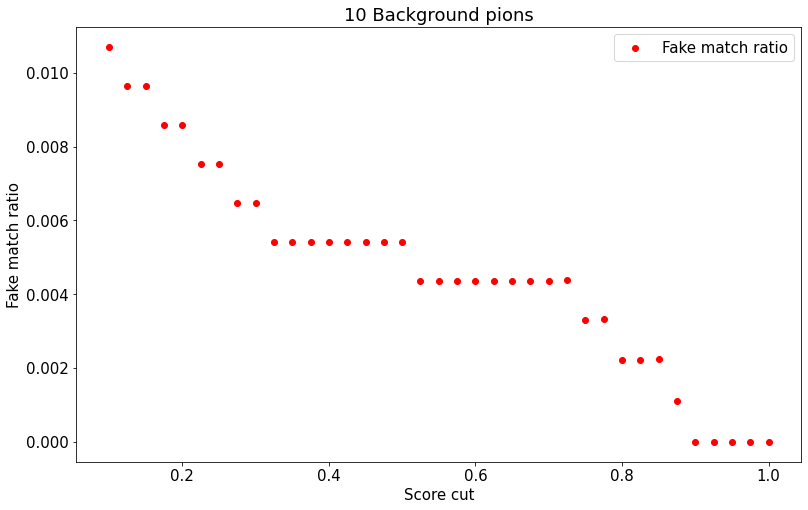

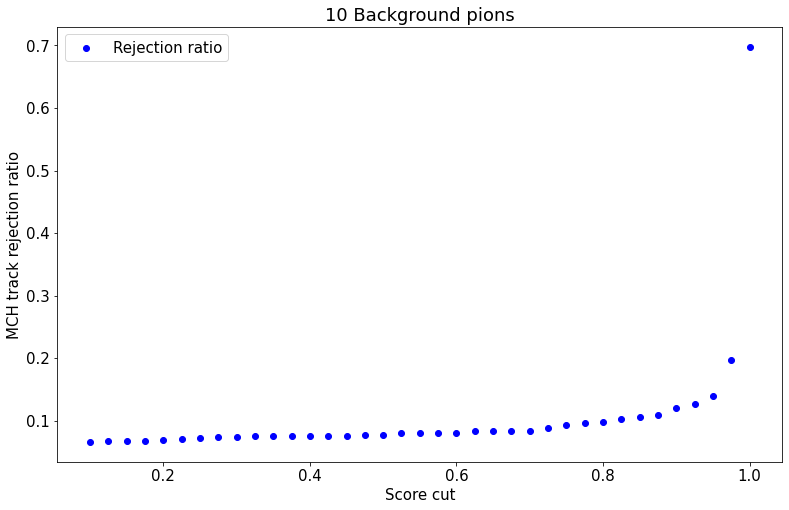

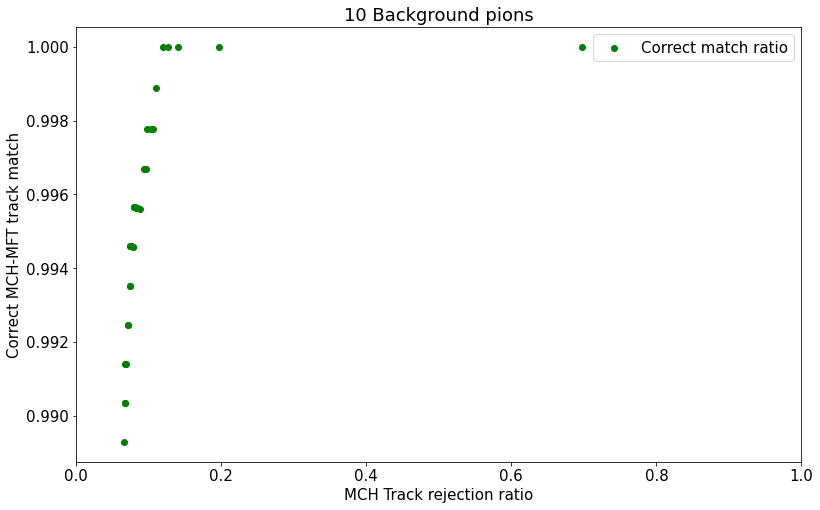

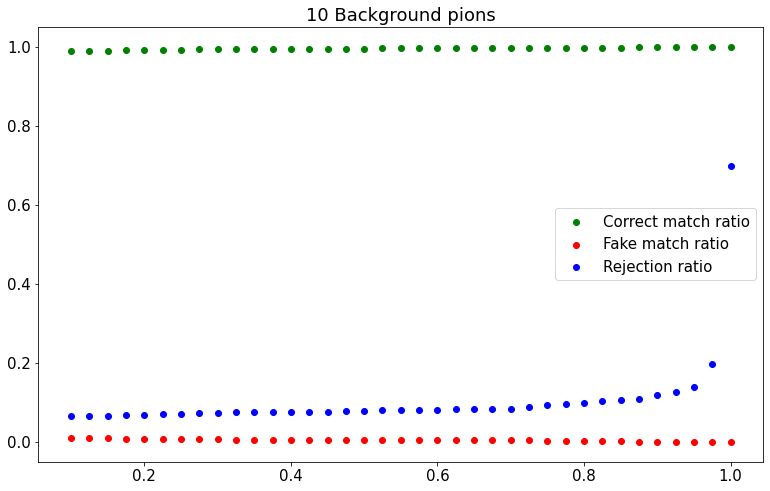

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [924. 924. 924. 924. 923. 922. 921. 920. 920. 920. 920. 919. 919. 919.
 919. 917. 917. 916. 916. 915. 915. 913. 912. 912. 912. 908. 904. 901.
 900. 895. 892. 889. 880. 873. 860. 803. 302.]
fake matches:  [10.  9.  9.  8.  8.  7.  7.  6.  6.  5.  5.  5.  5.  5.  5.  5.  5.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  3.  3.  2.  2.  2.  1.  0.  0.  0.  0.
  0.]
no matches:  [ 66.  67.  67.  68.  69.  71.  72.  74.  74.  75.  75.  76.  76.  76.
  76.  78.  78.  80.  80.  81.  81.  83.  84.  84.  84.  88.  93.  96.
  98. 103. 106. 110. 120. 127. 140. 197. 698.]


In [6]:
# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

In [7]:
test_data_matches = np.where(test_data_MatchTruth == 1)
first_test_data_match=test_data_matches[0][0]
print("Index of first_test_data_match: ",first_test_data_match)
Match_pred_single = mlpr.predict(test_data[first_test_data_match].reshape(1, -1))
print("Score:",Match_pred_single)

Index of first_test_data_match:  10
Score: [0.99936633]


In [8]:
print("Indexes of correct matches (input MC):")
print(test_data_matches)

Indexes of correct matches (input MC):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   945,   960,   991,  1019,  1062,
        1081,  1108,  1140,  1172,  1212,  1237,  1271,  1292,  1307,
        1335,  1364,  1396,  1421,  1448,  1453,  1489,  1500,  1523,
        1546,  1578,  1591,  1636,  1661,  1671,  1703,  1733,  1748,
        1784,  1804,  1857,  1876,  1903,  1944,  1965,  1974,  2001,
        2037,  2061,  2084,  2121,  2164,  2181,  2208,  2261,  2314,
        2345,  2361,  2402,  2422,  2476,  2491,  2520,  2576,  2583,
        2620,  2685,  2692,  2747,  2777,  2803,  2824,  2850,  2889,
        2918,  2933,  2962,  2991,  3029,  3049,  3076,  3117,  3179,
        3194,  3218,  3247,  3277,  3294,  3325,  3364,  3393,  3423,
        3448,  3465,  3530,  3544,  3563,  3586,  

In [9]:
print("Indexes of predicted matches for test data (score > 0.5):")
print(np.where(Match_pred > 0.5))

Indexes of predicted matches for test data (score > 0.5):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   960,   991,  1019,  1062,  1081,
        1091,  1108,  1140,  1172,  1212,  1237,  1271,  1292,  1307,
        1335,  1364,  1396,  1421,  1448,  1453,  1489,  1500,  1523,
        1546,  1578,  1591,  1671,  1703,  1733,  1748,  1784,  1804,
        1857,  1876,  1903,  1944,  1965,  1974,  2001,  2037,  2061,
        2084,  2121,  2164,  2181,  2208,  2261,  2314,  2345,  2361,
        2402,  2422,  2476,  2491,  2520,  2576,  2583,  2620,  2685,
        2747,  2777,  2803,  2823,  2824,  2850,  2889,  2918,  2933,
        2962,  2991,  3029,  3049,  3076,  3117,  3179,  3194,  3218,
        3219,  3247,  3274,  3277,  3294,  3325,  3364,  3393,  3423,
        3448,  3465,  3530,  35

# Evaluate MLP Regressor prediction at higher multiplicities

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_400PiPerEvent
Loaded data in  0.026400514100290214  minutes ( 1.5840308460174128  seconds)
N MCH Tracks = 1000
N pairs = 382091
Prediction accuracy:
 -46.07950707180582


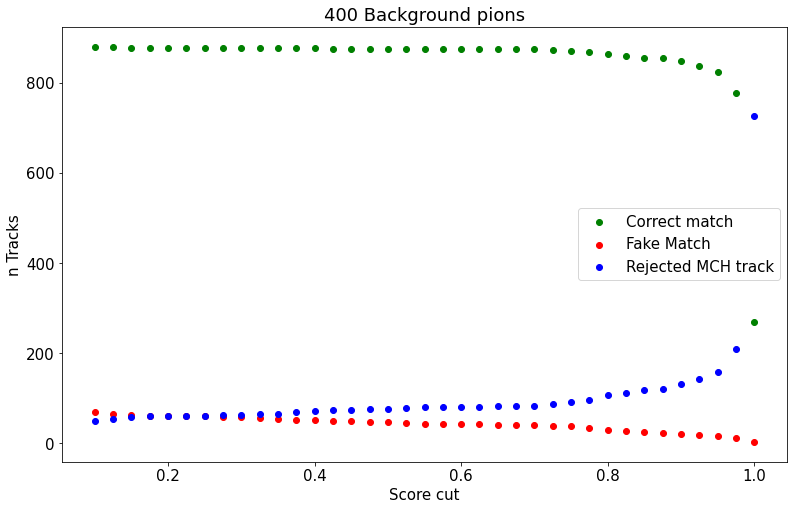

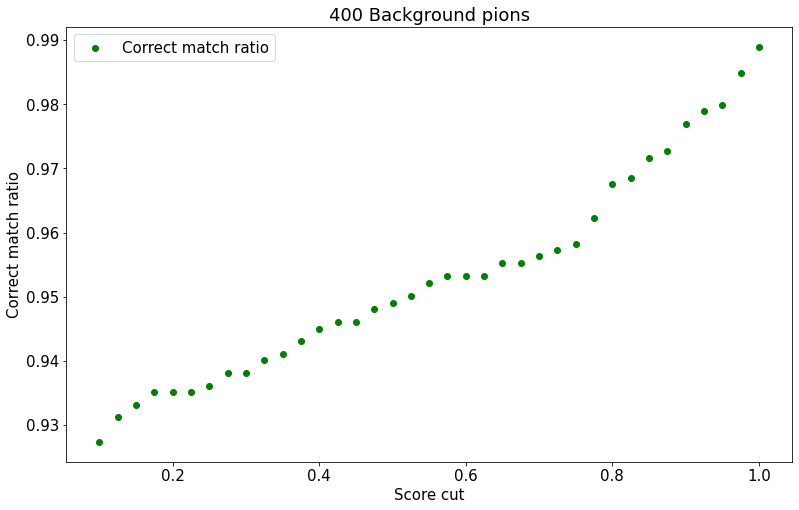

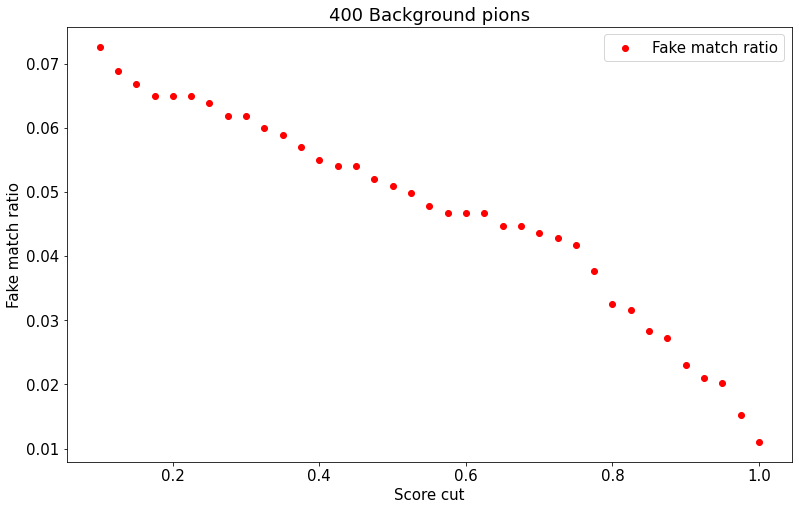

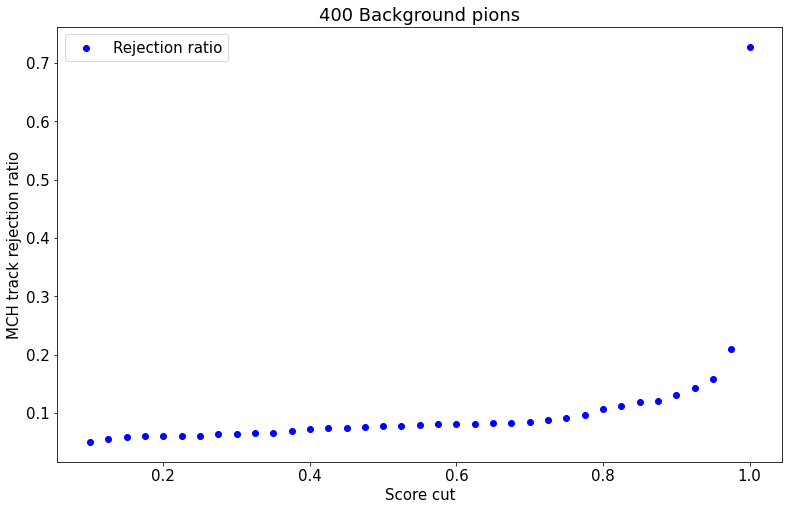

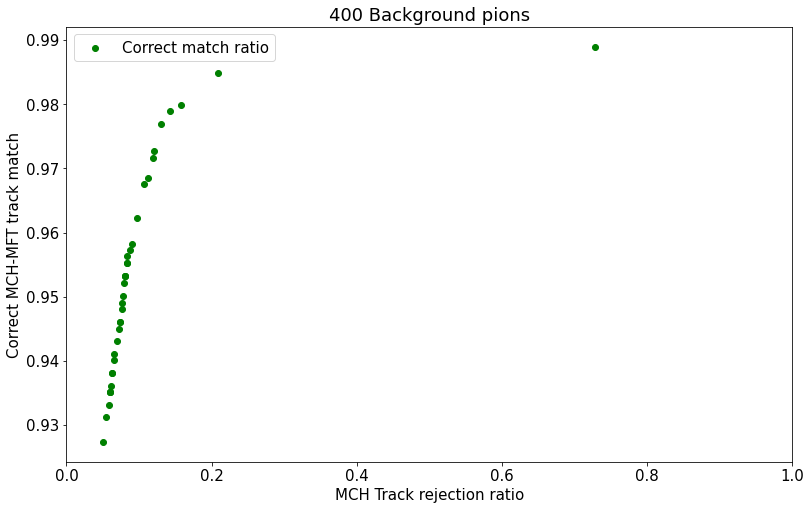

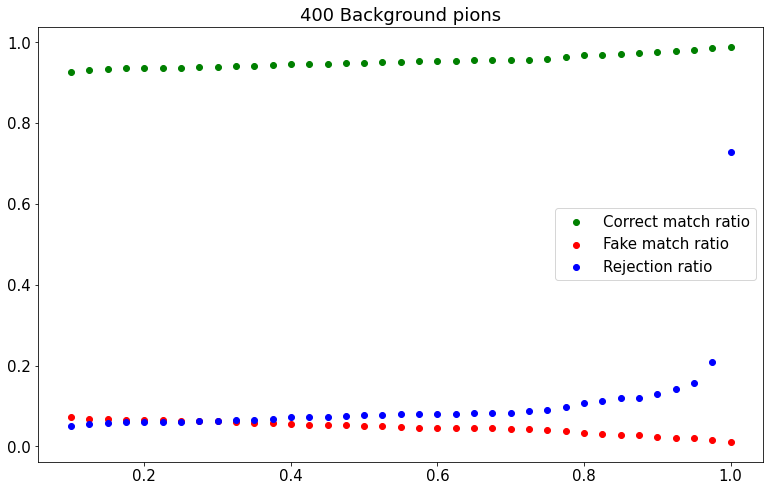

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [881. 880. 879. 879. 879. 879. 879. 879. 879. 879. 879. 878. 877. 876.
 876. 876. 876. 876. 876. 876. 876. 876. 876. 876. 876. 873. 871. 869.
 864. 860. 856. 855. 849. 839. 825. 779. 269.]
fake matches:  [69. 65. 63. 61. 61. 61. 60. 58. 58. 56. 55. 53. 51. 50. 50. 48. 47. 46.
 44. 43. 43. 43. 41. 41. 40. 39. 38. 34. 29. 28. 25. 24. 20. 18. 17. 12.
  3.]
no matches:  [ 50.  55.  58.  60.  60.  60.  61.  63.  63.  65.  66.  69.  72.  74.
  74.  76.  77.  78.  80.  81.  81.  81.  83.  83.  84.  88.  91.  97.
 107. 112. 119. 121. 131. 143. 158. 209. 728.]


In [10]:
# Load test data
NPions = "400"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_800PiPerEvent
Loaded data in  0.060965221833612304  minutes ( 3.6579133100167383  seconds)
N MCH Tracks = 1000
N pairs = 757144
Prediction accuracy:
 0.27596832569489205


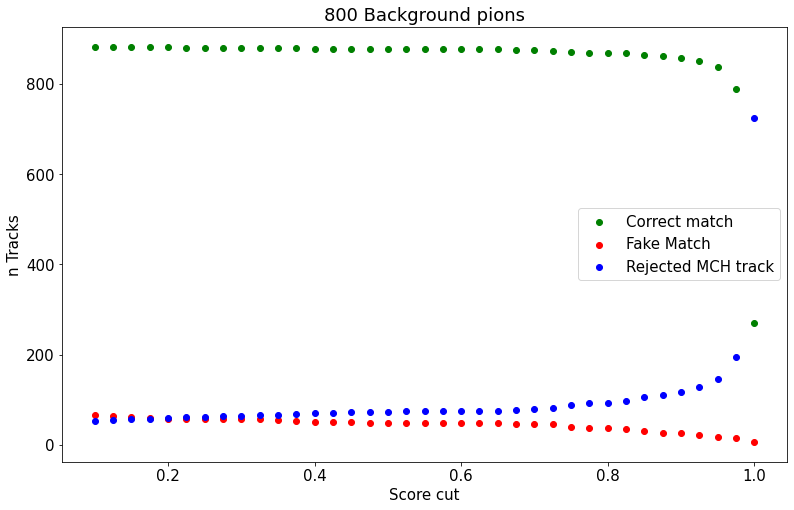

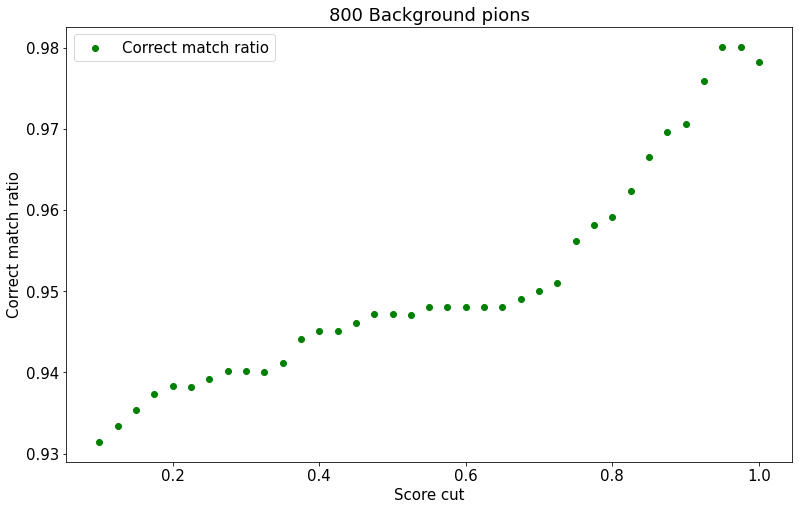

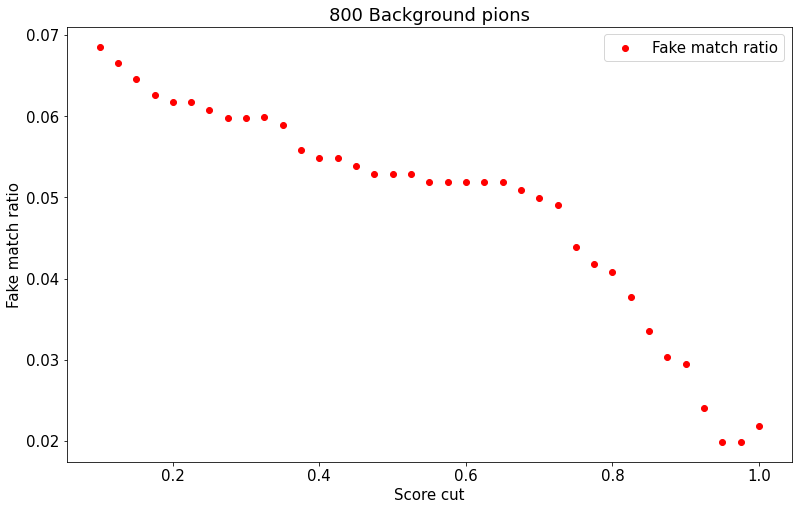

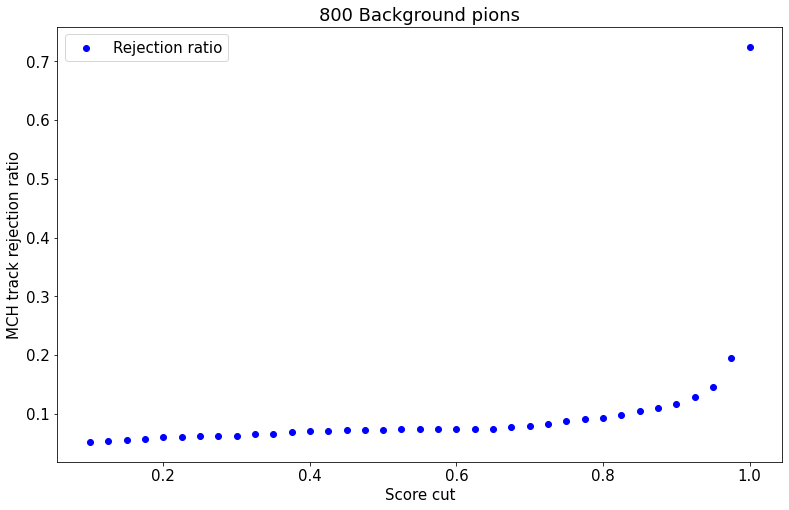

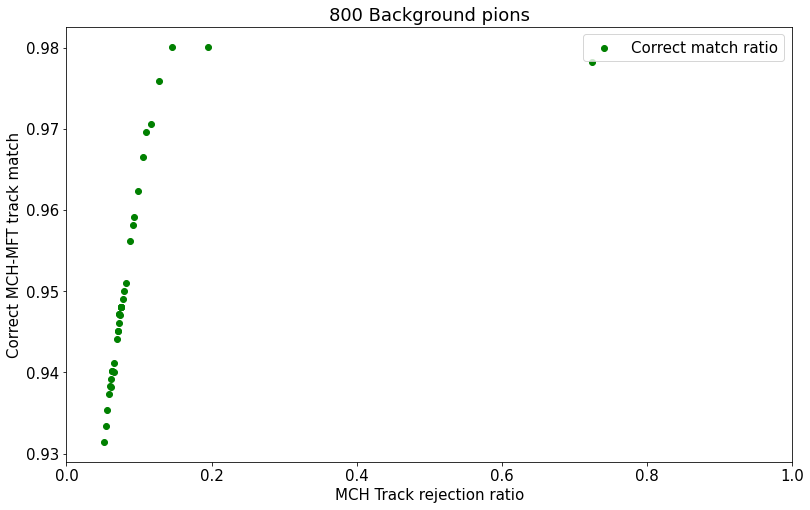

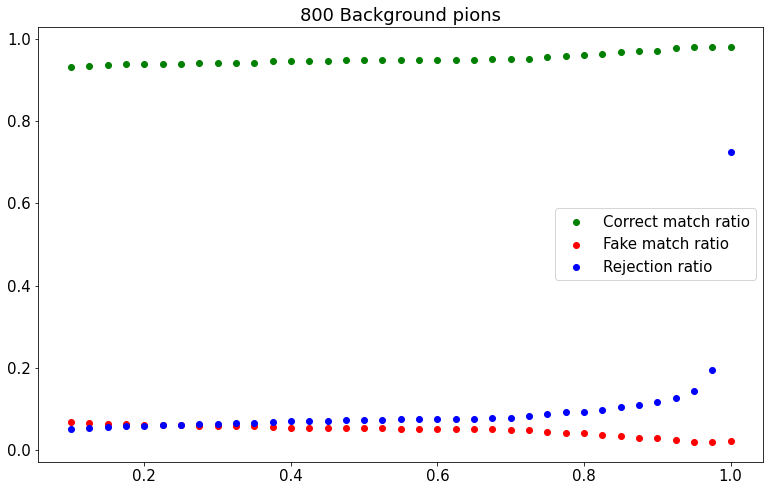

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [883. 883. 883. 883. 882. 881. 881. 881. 881. 879. 879. 879. 878. 878.
 878. 878. 878. 877. 877. 877. 877. 877. 877. 875. 875. 873. 872. 870.
 870. 868. 865. 863. 857. 851. 838. 789. 269.]
fake matches:  [65. 63. 61. 59. 58. 58. 57. 56. 56. 56. 55. 52. 51. 51. 50. 49. 49. 49.
 48. 48. 48. 48. 48. 47. 46. 45. 40. 38. 37. 34. 30. 27. 26. 21. 17. 16.
  6.]
no matches:  [ 52.  54.  56.  58.  60.  61.  62.  63.  63.  65.  66.  69.  71.  71.
  72.  73.  73.  74.  75.  75.  75.  75.  75.  78.  79.  82.  88.  92.
  93.  98. 105. 110. 117. 128. 145. 195. 725.]


In [11]:
# Load test data
NPions = "800"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")




Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_1200PiPerEvent
Loaded data in  0.0946699631002654  minutes ( 5.680197786015924  seconds)
N MCH Tracks = 1000
N pairs = 1148900
Prediction accuracy:
 0.21106469186339682


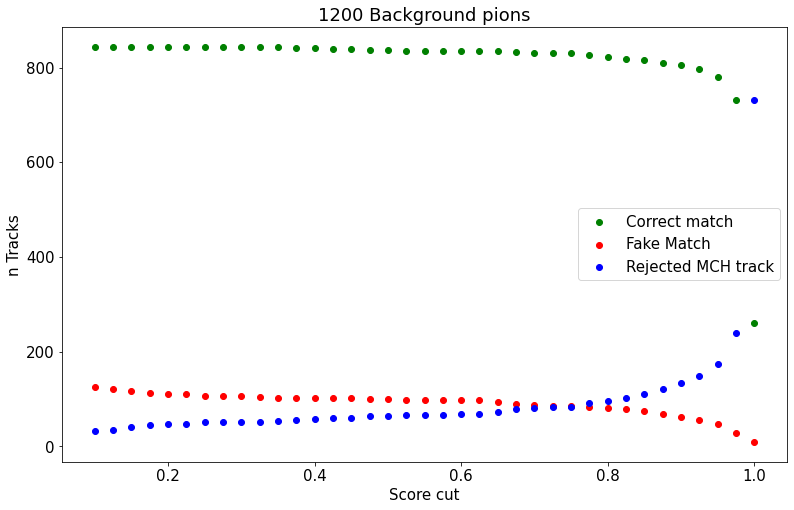

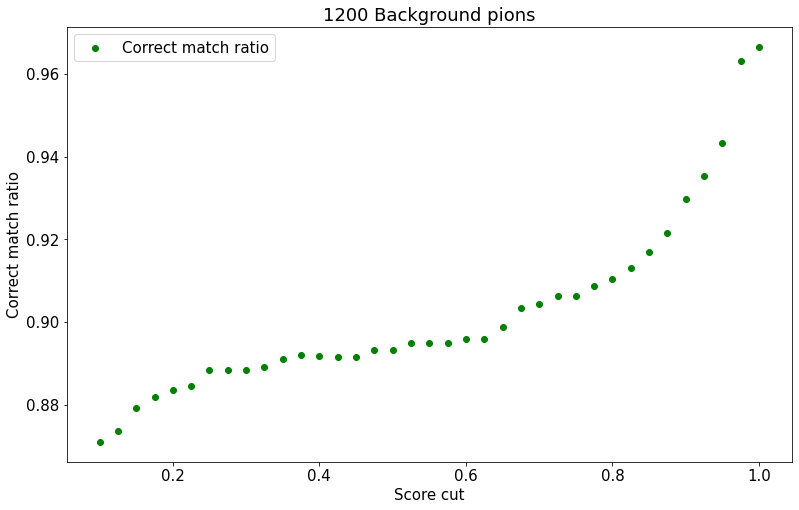

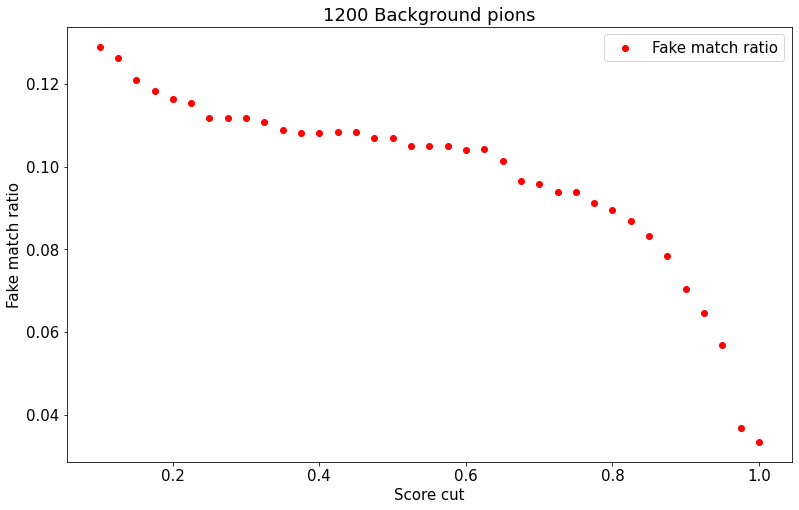

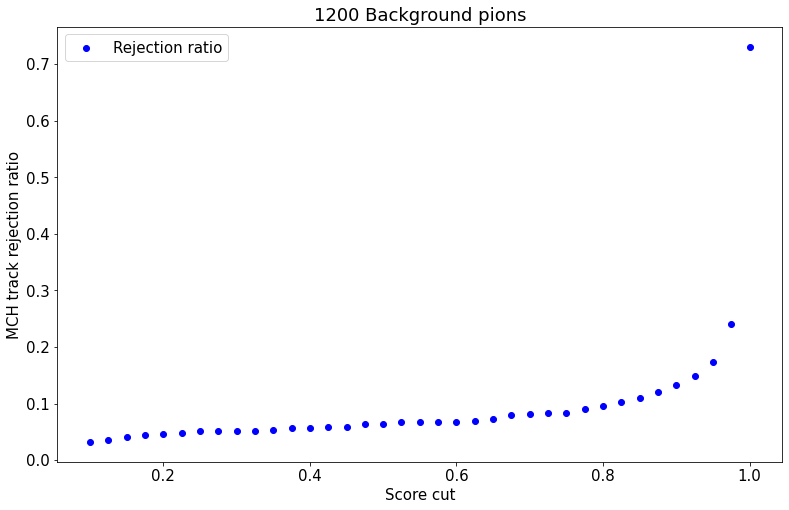

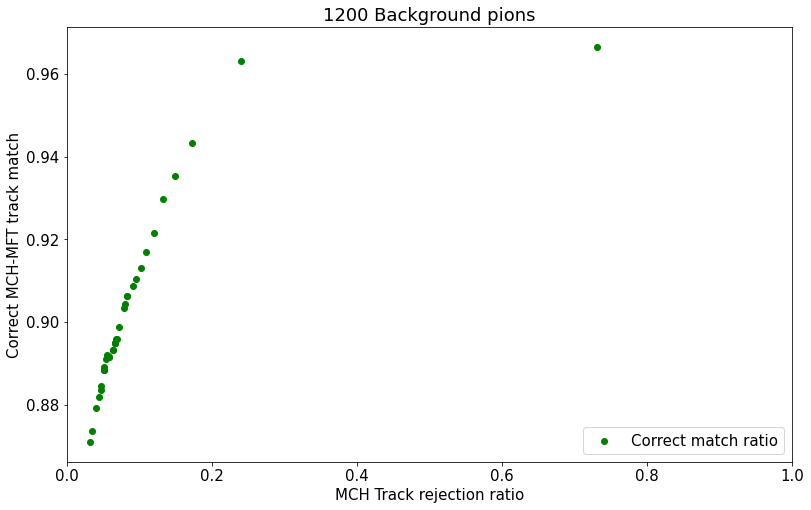

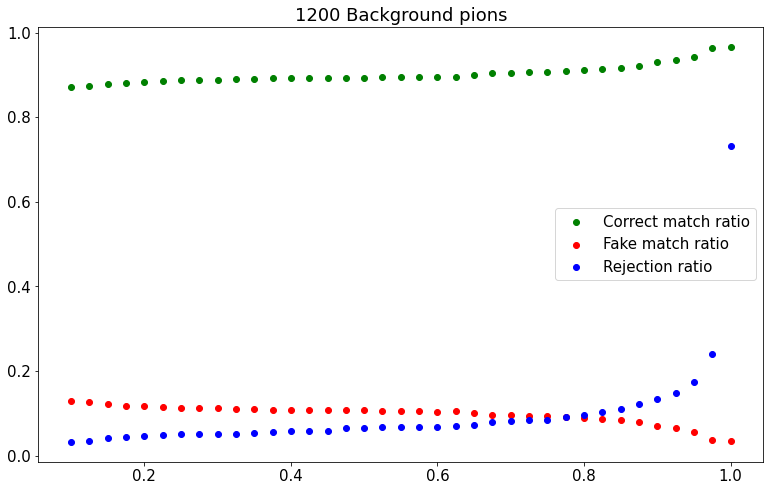

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [844. 844. 844. 843. 843. 843. 843. 843. 843. 843. 843. 842. 841. 839.
 839. 836. 836. 835. 835. 835. 835. 834. 834. 832. 831. 831. 831. 826.
 823. 819. 816. 810. 806. 796. 780. 732. 260.]
fake matches:  [125. 122. 116. 113. 111. 110. 106. 106. 106. 105. 103. 102. 102. 102.
 102. 100. 100.  98.  98.  98.  97.  97.  94.  89.  88.  86.  86.  83.
  81.  78.  74.  69.  61.  55.  47.  28.   9.]
no matches:  [ 32.  35.  41.  45.  47.  48.  51.  51.  51.  52.  54.  56.  57.  59.
  59.  64.  64.  67.  67.  67.  68.  69.  72.  79.  81.  83.  83.  91.
  96. 103. 110. 121. 133. 149. 173. 240. 731.]


In [12]:
# Load test data
NPions = "1200"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")